# Manipulación Avanzada de Datos
------------------------

En esta sección aprenderemos a manipular nuestro dataframe haciendo agrupaciones de datos o trabajando con más de un dataframe a la vez


## 1. Sumarización de Datos

Las sentencias de agrupamiento de datos nos ayudan a brindar información resumida que pueda ser facilmente analizada por diversas personas.

<img src='./img/group_by.jpg'>

El agrupamiento de datos implica utilizar funciones de agregacion como: `count`, `sum`, `mean`, `min`, `max` a una columna del df

In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd

df_reviews = pd.read_csv('./src/winemag-data-130k-v2.csv')
df_reviews.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [28]:
df_reviews.groupby(['country']).price.agg([len, min, max])

/tmp/ipykernel_14275/1732759353.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_reviews.groupby(['country']).price.agg([len, min, max])
/tmp/ipykernel_14275/1732759353.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_reviews.groupby(['country']).price.agg([len, min, max])


,len,min,max
country,,,
Argentina,1907,4.0,230.0
Armenia,1,14.0,14.0
Australia,1177,6.0,850.0
Austria,1635,7.0,150.0
Bosnia and Herzegovina,1,13.0,13.0
Brazil,31,10.0,45.0
Bulgaria,68,8.0,55.0
Canada,108,12.0,120.0
Chile,2258,5.0,400.0


## 2. Manipulando más de un DataFrame

### 2.1 Unificando o Concatenando DataFrames

Esto nos permite unificar información de Dataframs cuyas columnas sean iguales

<img src='https://pandas.pydata.org/docs/_images/08_concat_row.svg'>

In [29]:
# A manera de ejemplo veremos la unificación de 2 df's cuya data es similar

import pandas as pd

columns = ["date.utc", "location", "parameter", "value"]

df_air_quality_no2 = pd.read_csv("./src/air_quality_no2_long.csv", parse_dates=True, usecols=columns)
df_air_quality_pm25 = pd.read_csv("./src/air_quality_pm25_long.csv", parse_dates=True, usecols=columns)


In [30]:
df_air_quality_no2.head(2)



,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8


In [31]:
df_air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [32]:
# Unificando la información en un único df

df_air_quality = pd.concat([df_air_quality_pm25, df_air_quality_no2], axis=0)
df_air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [33]:
print('Shape of the ``air_quality_pm25`` table: ', df_air_quality_pm25.shape)

print('Shape of the ``air_quality_no2`` table: ', df_air_quality_no2.shape)

print('Shape of the resulting ``air_quality`` table: ', df_air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


### 2.2 Joins

Podemos unir dos dataframes en funcion de sus columnas comunes usando `merge`

La operacion merge implica combinar 2 df a partir de uno o más valores llave o `key`

<img src='./img/merge.png'>

In [34]:
# Unificaremos la información consolidada del df previo 
df_stations_coord = pd.read_csv("./src/air_quality_stations.csv")
df_stations_coord.head(2)

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100


In [35]:
# como llame emplearemos la columna 'location'

df_air_quality = pd.merge(df_air_quality, df_stations_coord, how="inner", on="location")
df_air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182


Como punto general existen diferentes formas de combinar los dataframe, siendo el método `inner` el utilizado por defecto

<img src='./img/merge_tipos.png'>

## Información Adicional


- Group By Explicado:  https://learnsql.com/blog/group-by-in-sql-explained/

- Combinando Múltiples dataFrames : https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html#min-tut-08-combine

In [36]:
# Ordenar los datos -> ordenar segun parametro y valor 

# False -> Descendente
# True -> Ascendente

df_air_quality.sort_values(by=['parameter', 'value'],ascending=[False, False])

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
68,2019-05-19 05:00:00+00:00,BETR801,pm25,60.0,51.20966,4.43182
67,2019-05-19 06:00:00+00:00,BETR801,pm25,58.5,51.20966,4.43182
69,2019-05-19 04:00:00+00:00,BETR801,pm25,56.5,51.20966,4.43182
66,2019-05-19 07:00:00+00:00,BETR801,pm25,56.0,51.20966,4.43182
70,2019-05-19 03:00:00+00:00,BETR801,pm25,52.5,51.20966,4.43182
...,...,...,...,...,...,...
3636,2019-05-30 06:00:00+00:00,London Westminster,no2,0.0,51.49467,-0.13193
3637,2019-05-30 05:00:00+00:00,London Westminster,no2,0.0,51.49467,-0.13193
3638,2019-05-30 04:00:00+00:00,London Westminster,no2,0.0,51.49467,-0.13193
3639,2019-05-30 03:00:00+00:00,London Westminster,no2,0.0,51.49467,-0.13193


In [37]:
df_air_quality.columns

Index(['date.utc', 'location', 'parameter', 'value', 'coordinates.latitude',
       'coordinates.longitude'],
      dtype='object')

In [38]:
# Renombrar al español los nombres de las columnas y almacenar los datos en una bd 

df_air_quality.rename(columns={'date.utc': 'fecha',
                               'location': 'locacion',
                               'parameter': 'parametro',
                               'value': 'valor',
                               'coordinates.latitude': 'latitud',
                               'coordinates.longitude': 'longitud'
                               }
                        , inplace=True)

In [39]:
df_air_quality.dtypes

fecha         object
locacion      object
parametro     object
valor        float64
latitud      float64
longitud     float64
dtype: object

In [40]:
df_air_quality.head(1)

,fecha,locacion,parametro,valor,latitud,longitud
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182


In [43]:
import sqlite3

with sqlite3.connect('clima.bd') as conn:

    df_air_quality.to_sql('calidad_aire2', con=conn, index=False)

In [44]:
df_air_quality['nueva_fecha'] = pd.to_datetime(df_air_quality.fecha)

df_air_quality

,fecha,locacion,parametro,valor,latitud,longitud,nueva_fecha
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182,2019-06-18 06:00:00+00:00
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182,2019-06-17 08:00:00+00:00
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182,2019-06-17 07:00:00+00:00
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182,2019-06-17 06:00:00+00:00
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182,2019-06-17 05:00:00+00:00
...,...,...,...,...,...,...,...
4177,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,51.49467,-0.13193,2019-05-07 06:00:00+00:00
4178,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,51.49467,-0.13193,2019-05-07 04:00:00+00:00
4179,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,51.49467,-0.13193,2019-05-07 03:00:00+00:00
4180,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,51.49467,-0.13193,2019-05-07 02:00:00+00:00


In [45]:
df_air_quality['year'] = pd.DatetimeIndex(df_air_quality['nueva_fecha']).year

df_air_quality

,fecha,locacion,parametro,valor,latitud,longitud,nueva_fecha,year
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182,2019-06-18 06:00:00+00:00,2019
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182,2019-06-17 08:00:00+00:00,2019
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182,2019-06-17 07:00:00+00:00,2019
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182,2019-06-17 06:00:00+00:00,2019
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182,2019-06-17 05:00:00+00:00,2019
...,...,...,...,...,...,...,...,...
4177,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,51.49467,-0.13193,2019-05-07 06:00:00+00:00,2019
4178,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,51.49467,-0.13193,2019-05-07 04:00:00+00:00,2019
4179,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,51.49467,-0.13193,2019-05-07 03:00:00+00:00,2019
4180,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,51.49467,-0.13193,2019-05-07 02:00:00+00:00,2019


In [46]:
df_air_quality.locacion.unique()

array(['BETR801', 'London Westminster', 'FR04014'], dtype=object)

In [47]:
df_group  = df_air_quality.groupby(['locacion', 'parametro']).aggregate({
    'valor': ['min', 'max', 'mean']
})

df_group

valor                 
                               min   max       mean
locacion           parametro                       
BETR801            no2         7.5  74.5  25.778947
                   pm25        3.0  60.0  21.504950
FR04014            no2         0.0  97.0  27.740538
London Westminster no2         0.0  97.0  24.777090
                   pm25        5.0  20.0   8.993062

<Axes: xlabel='locacion,parametro'>

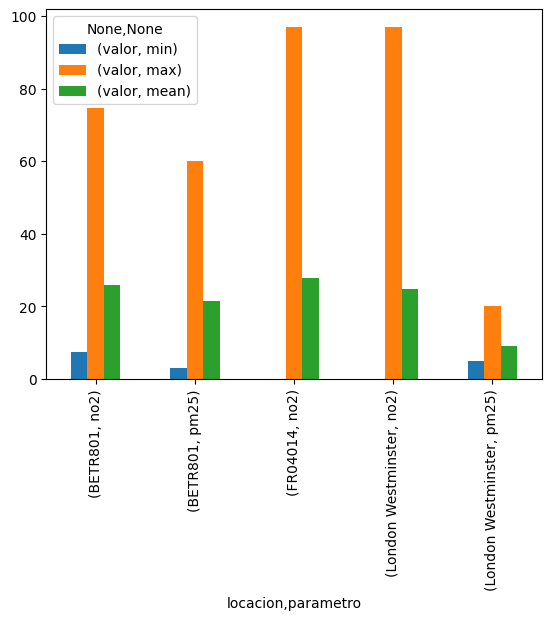

In [48]:
df_group.plot.bar()

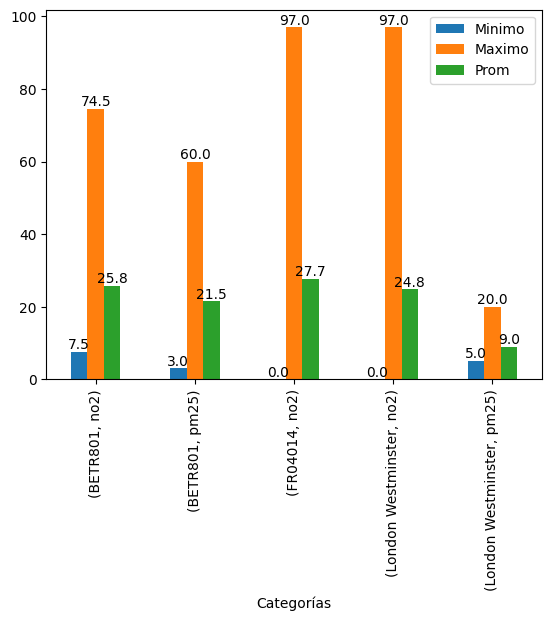

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_group es tu DataFrame de pandas
# Supongamos también que quieres cambiar el nombre de la leyenda a 'Valores'

# Crear un gráfico de barras
ax = df_group.plot.bar()

# Agregar etiquetas redondeadas a un decimal a cada barra
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Cambiar el nombre de la leyenda
ax.legend(['Minimo', 'Maximo', 'Prom'])
ax.set_xlabel('Categorías')

plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_group es tu DataFrame de pandas y ax es tu gráfico de barras

# Crear un gráfico de barras
ax = df_group.plot.bar()

# Agregar etiquetas redondeadas a un decimal a cada barra
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Guardar el gráfico como una imagen
plt.savefig('grafico.png')

# No olvides cerrar la figura después de guardarla como imagen
plt.close()

# Ahora puedes combinar los archivos en uno solo, si es necesario.